In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv("C:/Users/yunit/Downloads/data/processed_data.csv")
dataset.head()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


In [21]:
jatim = dataset[dataset['province'] == 'Jawa Timur']
jatim

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
8,6000000000,350,385,6.0,4,0,1.251784,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
9,1100000000,131,131,3.0,2,0,0.586065,Jawa Timur,Surabaya,NaN,NaN,NaN
15,550000000,70,80,2.0,2,0,1.003556,Jawa Timur,Surabaya,Asemrowo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
594693,550000000,45,92,2.0,1,1,1.166187,Jawa Timur,Malang,Dau,-7.921621,112.570394
594694,2250000000,200,279,3.0,2,0,0.739938,Jawa Timur,Malang,Lowokwaru,-7.932376,112.612110
594695,600000000,150,980,3.0,1,0,2.259864,Jawa Timur,Blitar,Kademangan,-8.145709,112.167985
594704,318000000,48,91,2.0,1,0,1.444679,Jawa Timur,Tuban,Jenu,-6.861966,112.022927


In [22]:
data = jatim.iloc[:20000]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
8,6000000000,350,385,6.0,4,0,1.251784,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
9,1100000000,131,131,3.0,2,0,0.586065,Jawa Timur,Surabaya,NaN,NaN,NaN
15,550000000,70,80,2.0,2,0,1.003556,Jawa Timur,Surabaya,Asemrowo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
114236,1350000000,100,153,3.0,2,0,0.586065,Jawa Timur,Surabaya,Sambikerep,-7.268024,112.670549
114237,1350000000,153,153,4.0,2,0,0.586065,Jawa Timur,Surabaya,Sambikerep,-7.268024,112.670549
114238,1350000000,100,138,3.0,2,0,0.586065,Jawa Timur,Surabaya,Gubeng,-7.268332,112.769743
114239,2000000000,130,159,4.0,3,0,0.586065,Jawa Timur,Surabaya,Mulyorejo,-7.269673,112.790879


In [23]:
data = data.drop(['z','latitude', 'longitude'], axis=1)
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
0,850000000,100,50,3.0,2,0,Jawa Timur,Surabaya,Tambaksari
4,1800000000,150,180,3.0,2,0,Jawa Timur,Sidoarjo,Sidoarjo
8,6000000000,350,385,6.0,4,0,Jawa Timur,Sidoarjo,Sidoarjo
9,1100000000,131,131,3.0,2,0,Jawa Timur,Surabaya,NaN
15,550000000,70,80,2.0,2,0,Jawa Timur,Surabaya,Asemrowo
...,...,...,...,...,...,...,...,...,...
114236,1350000000,100,153,3.0,2,0,Jawa Timur,Surabaya,Sambikerep
114237,1350000000,153,153,4.0,2,0,Jawa Timur,Surabaya,Sambikerep
114238,1350000000,100,138,3.0,2,0,Jawa Timur,Surabaya,Gubeng
114239,2000000000,130,159,4.0,3,0,Jawa Timur,Surabaya,Mulyorejo


In [30]:
missing_values = data.isnull().sum()
missing_values

price           0
buildingSize    0
landSize        0
bedRooms        0
bathRooms       0
garages         0
province        0
city            0
district        0
dtype: int64

In [31]:
data = data.dropna()
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
0,850000000,100,50,3.0,2,0,Jawa Timur,Surabaya,Tambaksari
4,1800000000,150,180,3.0,2,0,Jawa Timur,Sidoarjo,Sidoarjo
8,6000000000,350,385,6.0,4,0,Jawa Timur,Sidoarjo,Sidoarjo
15,550000000,70,80,2.0,2,0,Jawa Timur,Surabaya,Asemrowo
16,1499000000,122,88,3.0,3,0,Jawa Timur,Surabaya,Mulyorejo
...,...,...,...,...,...,...,...,...,...
114236,1350000000,100,153,3.0,2,0,Jawa Timur,Surabaya,Sambikerep
114237,1350000000,153,153,4.0,2,0,Jawa Timur,Surabaya,Sambikerep
114238,1350000000,100,138,3.0,2,0,Jawa Timur,Surabaya,Gubeng
114239,2000000000,130,159,4.0,3,0,Jawa Timur,Surabaya,Mulyorejo


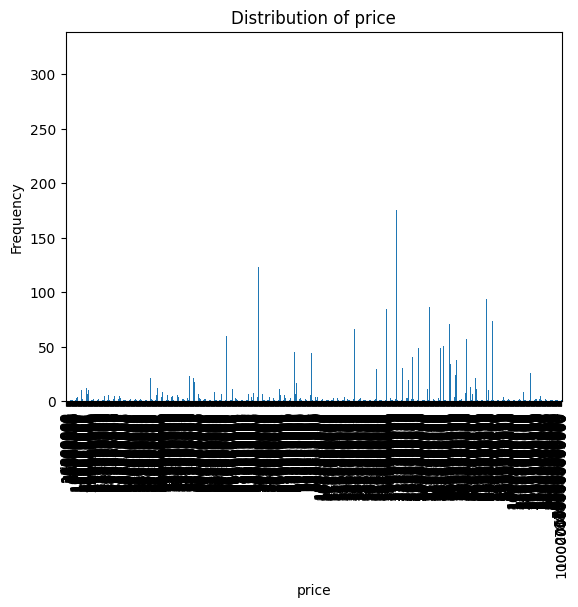

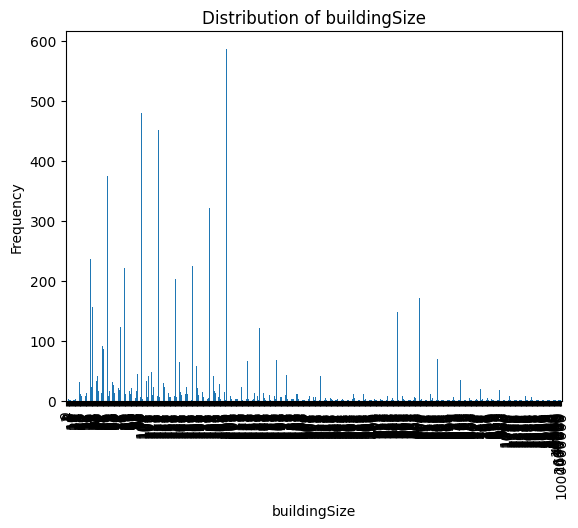

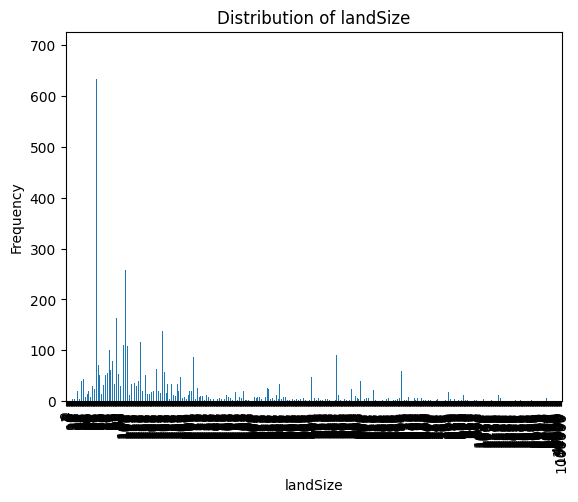

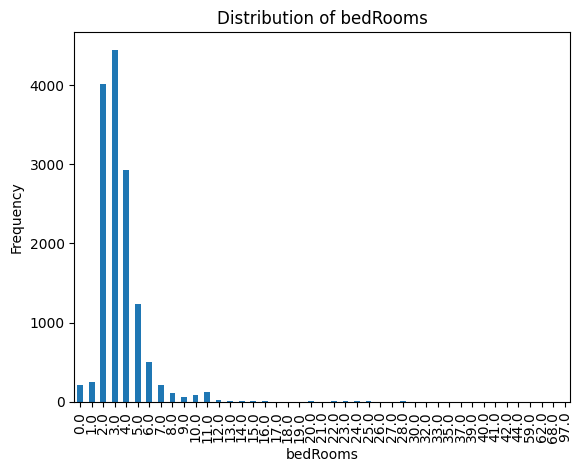

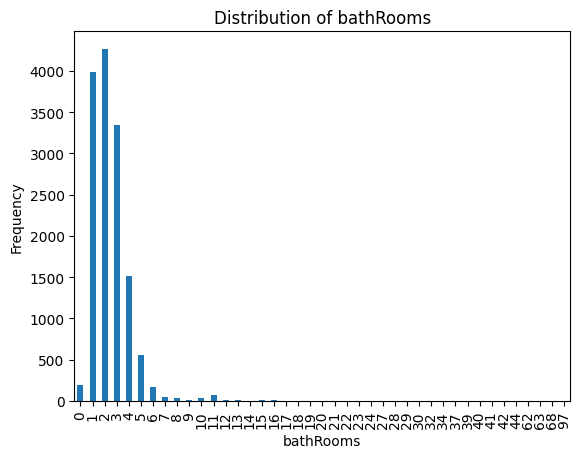

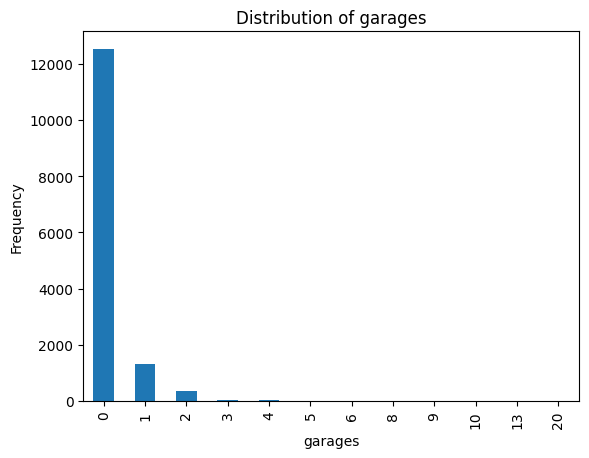

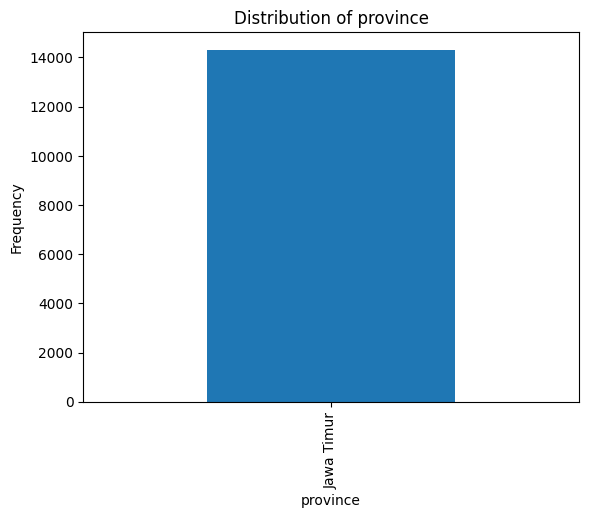

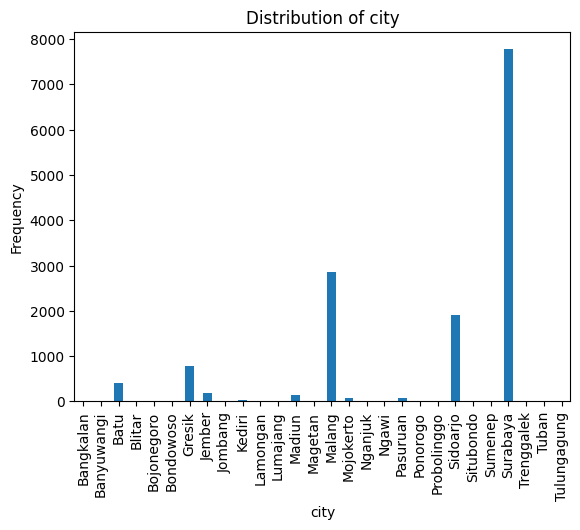

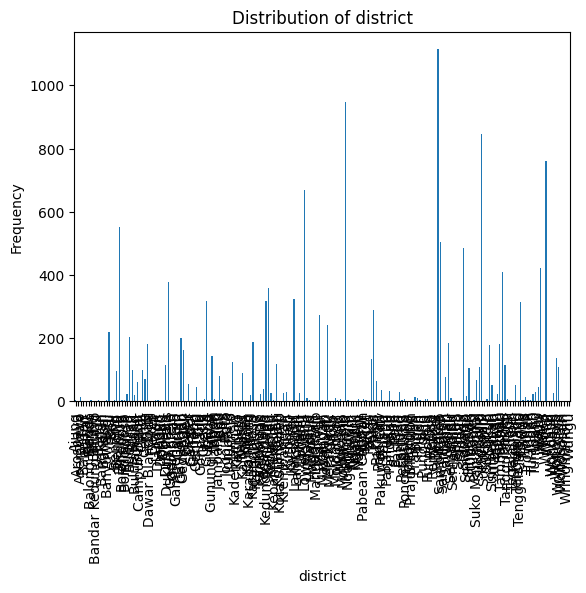

In [29]:
for column in data.columns:
    plt.figure()
    data[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [34]:
import ydata_profiling as pp

profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]